In [1]:
#PROJET analyse de Données: US 2020 Elections

In [178]:
import pandas as pd
import numpy as np
import prince

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [180]:
US_data = pd.read_csv("./data.csv",sep=None, engine='python')

US_data = US_data.drop(US_data.columns[0], axis=1)

US_data.head()

,County,State,Democrat vote raw,Democrat vote %,Republican vote raw,Republican vote %,Other vote raw,Other vote %,Less than 9th grade,9th to 12th grade,HS graduate and eq,"College,No Degree",Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Median income,Mean income,Area,Density,Total Pop,Hispanic or Latino %,NH-White %,NH-Black %,NH-American Native %,NH-Asian %,NH-Native Pacific Islander %,NH-Other Race %,NH-Two or More Races %,"% in Management, business, science, and arts",% in Service,% in Sales and Office,% in Resources and Construction,% in Transportation
0,Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,7.90%,31.10%,21.00%,8.70%,16.70%,12.80%,0.4541,"68,315","90,372",1539.63,38.17,58805,3.60,70.71,19.30,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,6.40%,27.80%,21.70%,9.60%,20.00%,12.50%,0.4648,"71,039","96,027",4117.73,56.69,231767,5.47,80.47,7.77,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,16.20%,36.80%,19.90%,7.90%,6.60%,5.30%,0.5098,"39,712","60,128",2292.16,10.85,25223,5.99,43.95,46.98,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,14.70%,40.90%,19.10%,8.00%,6.60%,4.30%,0.4553,"50,669","65,131",1612.19,13.80,22293,3.32,73.75,19.69,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,11.10%,35.30%,20.70%,11.00%,9.40%,5.30%,0.4475,"57,440","75,954",1670.26,35.37,59134,9.76,84.15,1.40,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


In [182]:
dem = np.array(US_data["Democrat vote raw"])
rep = np.array(US_data["Republican vote raw"])

result = np.where(dem > rep, 'Democrat', 'Republican')

# Using 'Address' as the column name
# and equating it to the list
US_data['Parti'] = result

US_data.head()

,County,State,Democrat vote raw,Democrat vote %,Republican vote raw,Republican vote %,Other vote raw,Other vote %,Less than 9th grade,9th to 12th grade,HS graduate and eq,"College,No Degree",Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Median income,Mean income,Area,Density,Total Pop,Hispanic or Latino %,NH-White %,NH-Black %,NH-American Native %,NH-Asian %,NH-Native Pacific Islander %,NH-Other Race %,NH-Two or More Races %,"% in Management, business, science, and arts",% in Service,% in Sales and Office,% in Resources and Construction,% in Transportation,Parti
0,Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,7.90%,31.10%,21.00%,8.70%,16.70%,12.80%,0.4541,"68,315","90,372",1539.63,38.17,58805,3.60,70.71,19.30,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36,Republican
1,Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,6.40%,27.80%,21.70%,9.60%,20.00%,12.50%,0.4648,"71,039","96,027",4117.73,56.69,231767,5.47,80.47,7.77,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13,Republican
2,Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,16.20%,36.80%,19.90%,7.90%,6.60%,5.30%,0.5098,"39,712","60,128",2292.16,10.85,25223,5.99,43.95,46.98,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09,Republican
3,Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,14.70%,40.90%,19.10%,8.00%,6.60%,4.30%,0.4553,"50,669","65,131",1612.19,13.80,22293,3.32,73.75,19.69,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47,Republican
4,Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,11.10%,35.30%,20.70%,11.00%,9.40%,5.30%,0.4475,"57,440","75,954",1670.26,35.37,59134,9.76,84.15,1.40,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73,Republican


In [184]:
# Remplacer les valeurs "-" par NaN dans l'ensemble du DataFrame
US_data.replace("-", np.nan, inplace=True)

# Supprimer les lignes avec des NaN dans toutes les colonnes
US_data.dropna(inplace=True)

In [186]:
# Nettoyage des colonnes de pourcentages (enlève les % et les convertis en pourcentage)
US_data[colonnes_pourcentages] = US_data[colonnes_pourcentages].replace('%', '', regex=True)
US_data[colonnes_pourcentages] = US_data[colonnes_pourcentages].apply(pd.to_numeric) / 100

# Suppression des virgules dans les colonnes Median income et Mean income
US_data['Median income'] = US_data['Median income'].astype(str).str.replace(",", "").astype(float)
US_data['Mean income'] = US_data['Mean income'].astype(str).str.replace(",", "").astype(float)

# Affichage des premières lignes pour vérifier
pd.set_option('display.max_columns', None) 
print(US_data.head())

           County    State  Democrat vote raw  Democrat vote %  \
0  Autauga County  Alabama               7503            27.02   
1  Baldwin County  Alabama              24578            22.41   
2  Barbour County  Alabama               4816            45.79   
3     Bibb County  Alabama               1986            20.70   
4   Blount County  Alabama               2640             9.57   

   Republican vote raw  Republican vote %  Other vote raw  Other vote %  \
0                19838              71.44             429          1.54   
1                83544              76.17            1557          1.42   
2                 5622              53.45              80          0.76   
3                 7525              78.43              84          0.88   
4                24711              89.57             237          0.86   

   Less than 9th grade  9th to 12th grade  HS graduate and eq  \
0                0.017              0.079               0.311   
1                0.020

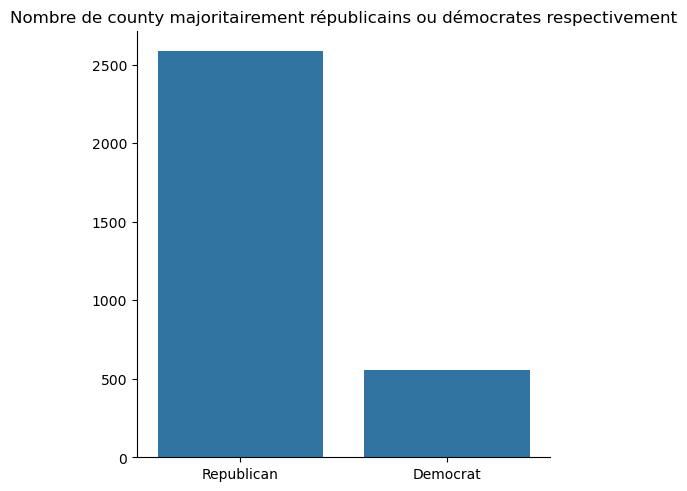

In [188]:
fig = sns.catplot(data=US_data, x='Parti', kind='count')
#fig.set_xticklabels(["Men", "Women", "Children"])

plt.xlabel('')
plt.ylabel('')
plt.title('Nombre de county majoritairement républicains ou démocrates respectivement')
plt.show()

# --- #
print('')

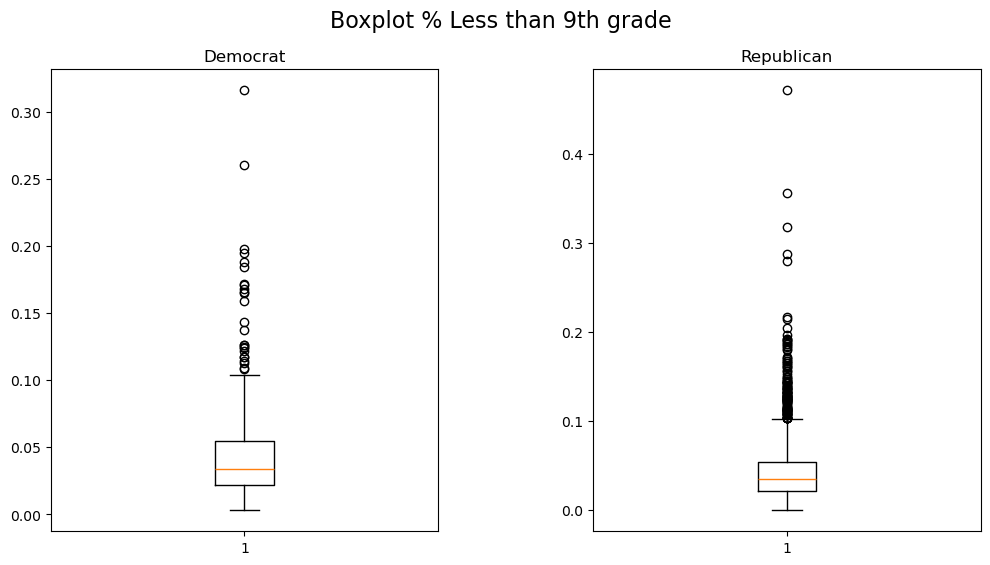

In [190]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Less than 9th grade', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Less than 9th grade'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Less than 9th grade'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

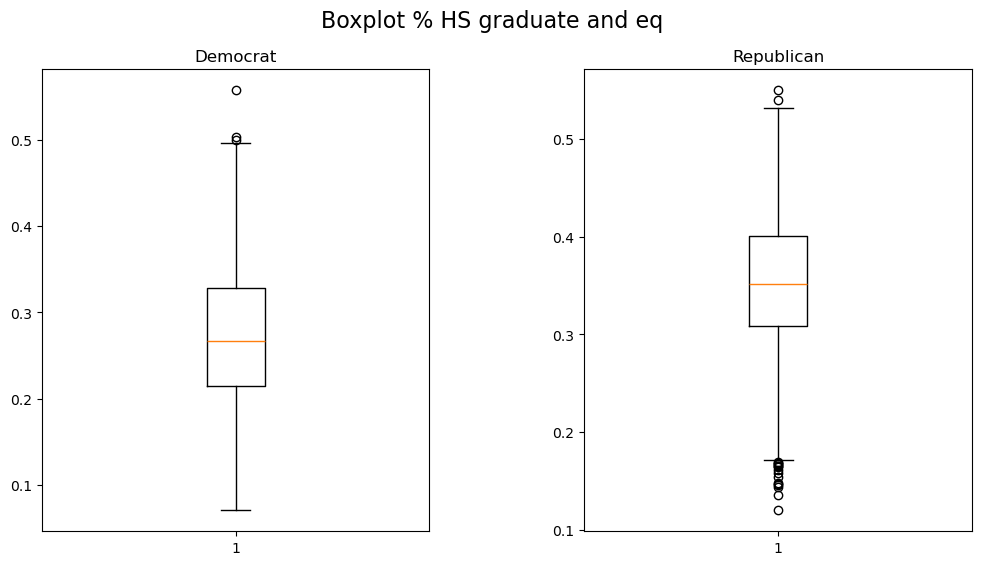

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % HS graduate and eq', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'HS graduate and eq'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'HS graduate and eq'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

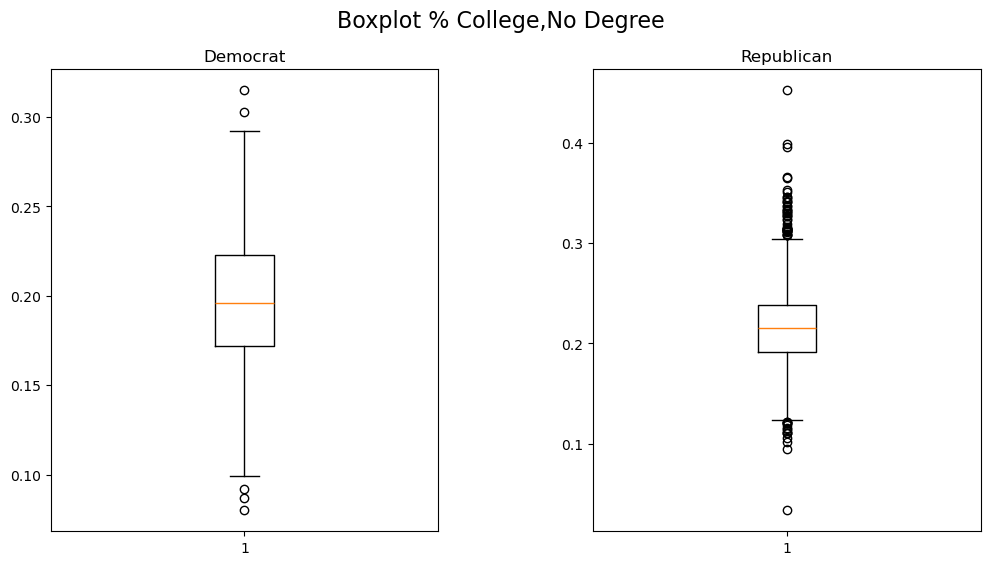

In [194]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % College,No Degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'College,No Degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'College,No Degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

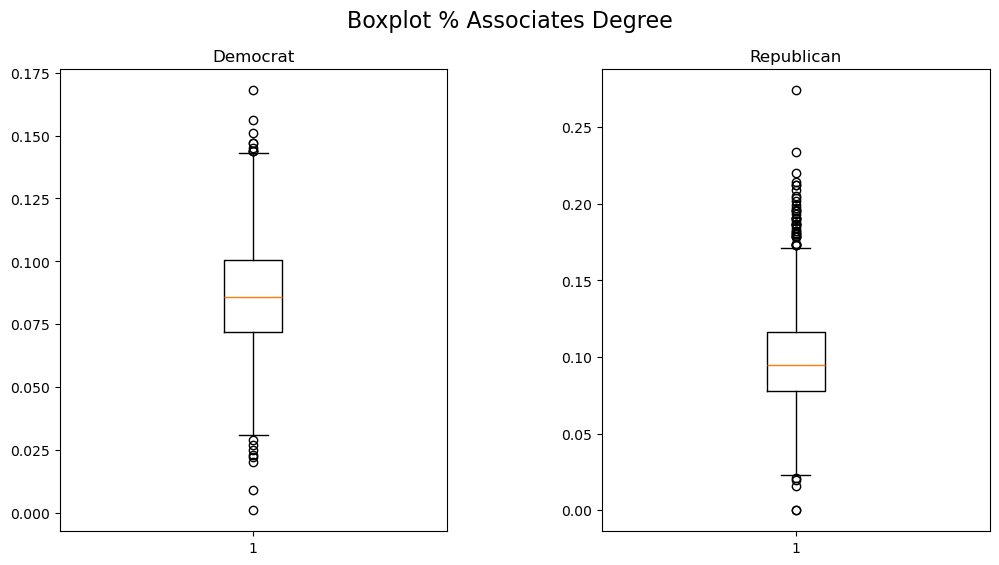

In [196]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Associates Degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Associates Degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Associates Degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

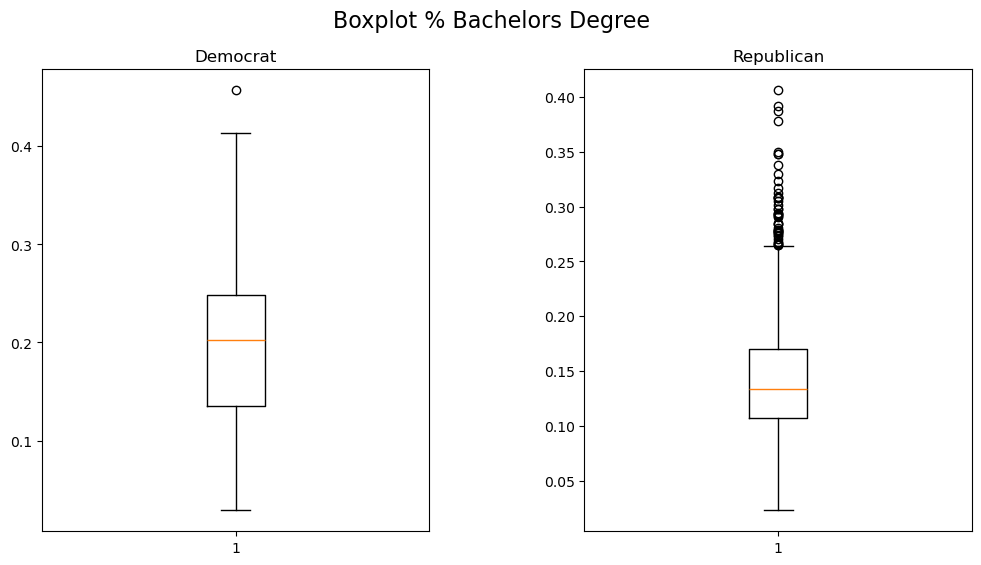

In [198]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Bachelors Degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Bachelors Degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Bachelors Degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

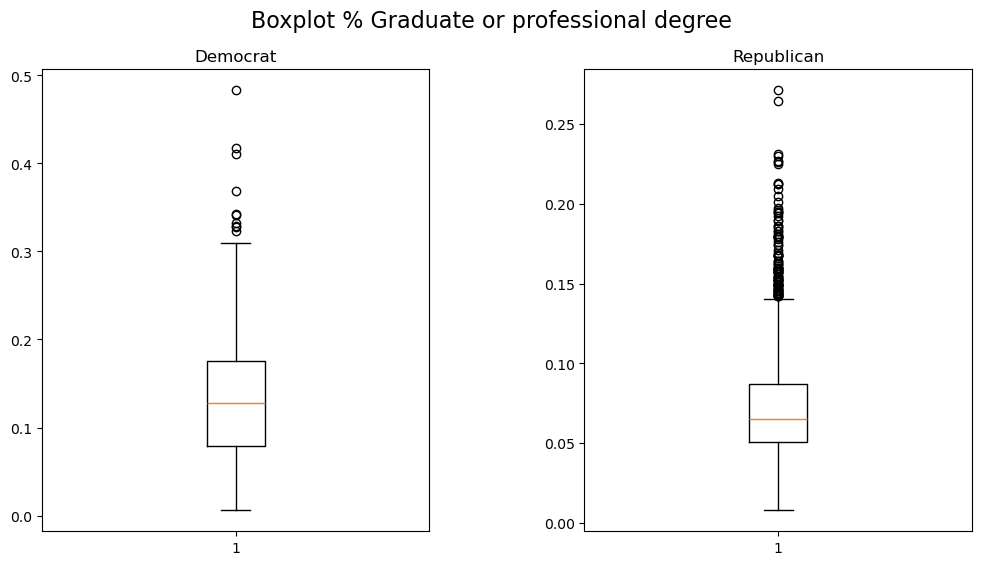

<Figure size 640x480 with 0 Axes>

In [200]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Graduate or professional degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Graduate or professional degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Graduate or professional degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()
axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'HS graduate and eq'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'HS graduate and eq'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

In [202]:
US_dataACP = US_data.drop(['County', 'State','Parti'], axis=1)

pd.set_option('display.max_columns', None) 
US_dataACP.head()


,Democrat vote raw,Democrat vote %,Republican vote raw,Republican vote %,Other vote raw,Other vote %,Less than 9th grade,9th to 12th grade,HS graduate and eq,"College,No Degree",Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Median income,Mean income,Area,Density,Total Pop,Hispanic or Latino %,NH-White %,NH-Black %,NH-American Native %,NH-Asian %,NH-Native Pacific Islander %,NH-Other Race %,NH-Two or More Races %,"% in Management, business, science, and arts",% in Service,% in Sales and Office,% in Resources and Construction,% in Transportation
0,7503,27.02,19838,71.44,429,1.54,0.017,0.079,0.311,0.210,0.087,0.167,0.128,0.4541,68315.0,90372.0,1539.63,38.17,58805,3.60,70.71,19.30,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,24578,22.41,83544,76.17,1557,1.42,0.020,0.064,0.278,0.217,0.096,0.200,0.125,0.4648,71039.0,96027.0,4117.73,56.69,231767,5.47,80.47,7.77,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,4816,45.79,5622,53.45,80,0.76,0.073,0.162,0.368,0.199,0.079,0.066,0.053,0.5098,39712.0,60128.0,2292.16,10.85,25223,5.99,43.95,46.98,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,1986,20.70,7525,78.43,84,0.88,0.064,0.147,0.409,0.191,0.080,0.066,0.043,0.4553,50669.0,65131.0,1612.19,13.80,22293,3.32,73.75,19.69,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,2640,9.57,24711,89.57,237,0.86,0.071,0.111,0.353,0.207,0.110,0.094,0.053,0.4475,57440.0,75954.0,1670.26,35.37,59134,9.76,84.15,1.40,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


In [204]:
scaler = StandardScaler()
US_data_scaled = scaler.fit_transform(US_dataACP)

# 2. Application de l'ACP
pca = PCA()
pca.fit(US_data_scaled)

PCA()

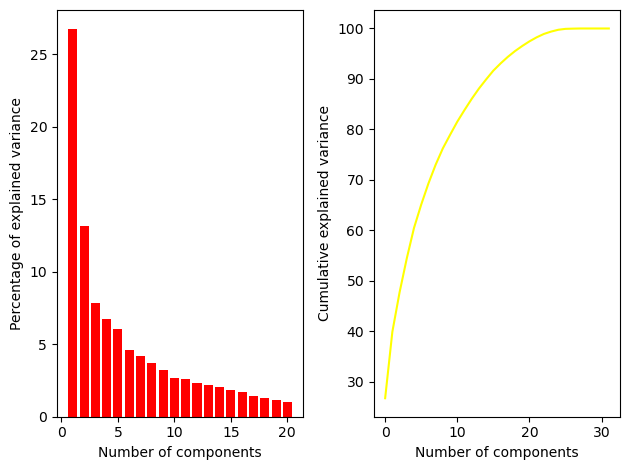

In [222]:
explained_var_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 20
plt.bar(np.arange(1,n_bars+1), explained_var_ratio[:n_bars], color='red')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_var_ratio),color='yellow')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance");

plt.tight_layout()
plt.show()

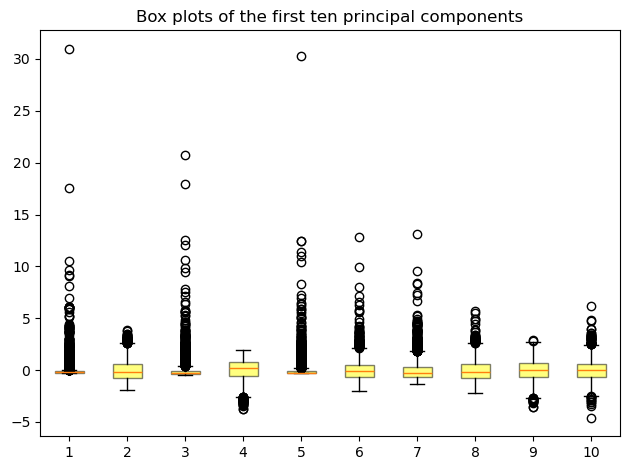

In [228]:
box = plt.boxplot(US_data_scaled[:,:10],patch_artist=True)
plt.setp(box["boxes"],facecolor="yellow",alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

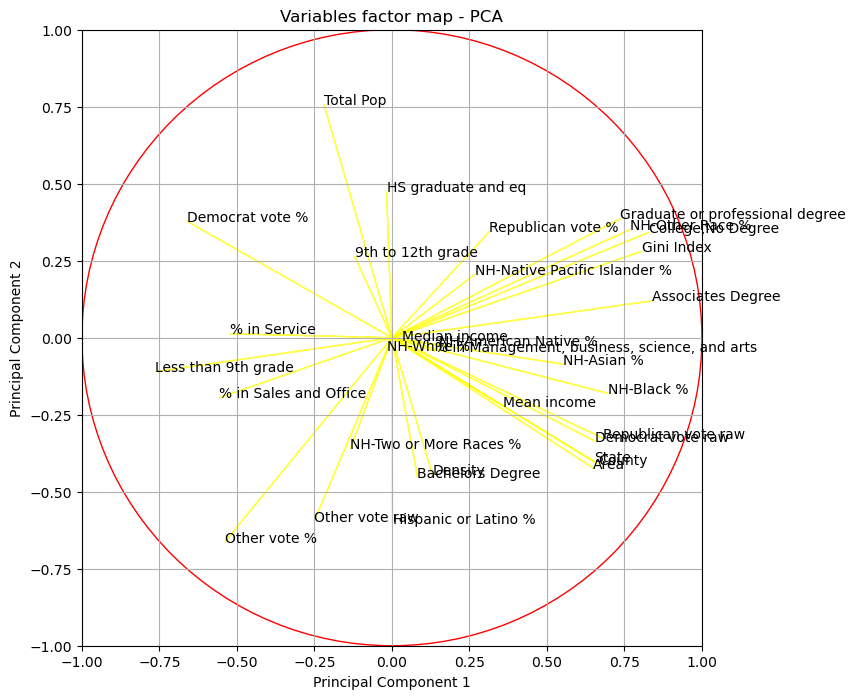

In [232]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
coord3 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
for i, j, nom in zip(coord1, coord2, US_data.columns):
    plt.text(i,j,nom,fontsize=10)
    plt.arrow(0,0,i,j,color = 'yellow', alpha=0.7,width = 0.0001)

plt.axis((-1,1,-1,1))
plt.gcf().gca().add_artist(plt.Circle((0,0), radius = 1, color = 'red', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

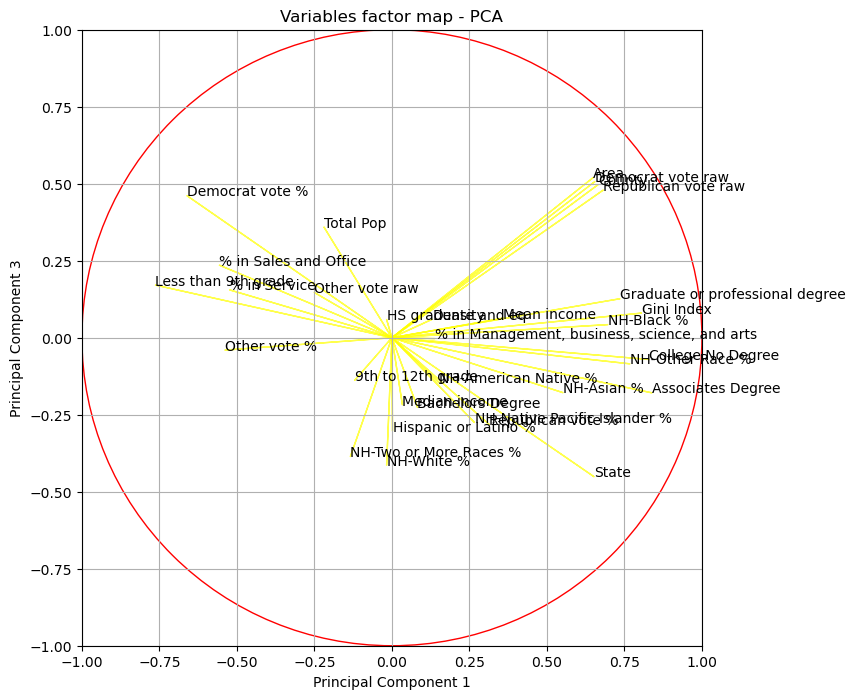

In [236]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
for i, j, nom in zip(coord1, coord3, US_data.columns):
    plt.text(i,j,nom,fontsize=10)
    plt.arrow(0,0,i,j,color = 'yellow', alpha=0.7,width = 0.0001)

plt.axis((-1,1,-1,1))
plt.gcf().gca().add_artist(plt.Circle((0,0), radius = 1, color = 'red', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

plt.grid(True)
plt.show()